<a href="https://colab.research.google.com/github/jumafernandez/dsI/blob/main/entregas/primer-entrega/DSI_Primer_entrega_ejemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción

Para el desarrollo del presente trabajo escogí un dataset que incluye un listado de canciones de la empresa Spotity.
Opté por este dataset debido a que siempre me intereso analizar si el éxito de una canción depende de alguna caracterísitca específica de la misma y ,por lo tanto, si se puede predecir el exito de una canción previa a su lanzamiento.


Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace:
https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=submission.csv

Este conjunto de datos proporciona información (danzabilidad, tonalidad, duración, popularidad, etc) sobre un listado de temas músicales.

Importación de Librerías y Carga de Datos

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/DATASET.xlsx')
df.head(15)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Genero
0,Us The Duo,drivers license,55.0,0.374,0.3500,10.0,-11.48,1,0.1760,0.84300,NaN,0.1880,0.1290,74464.00,3.811567e+08,1.0,0,Acoustic/Folk_0
1,Pathiena,The Deepest Of Sorrow,40.0,0.645,0.3290,2.0,-16642.00,1,0.0419,0.23900,0.892000,0.3750,0.1840,128099.00,3.545833e+09,4.0,0,Acoustic/Folk_0
2,Noah Kahan,Young Blood - Acoustic,59.0,0.691,0.2310,11.0,-10512.00,1,0.0471,0.81500,NaN,0.1030,0.2980,85153.00,3.343550e+05,4.0,0,Acoustic/Folk_0
3,Lawrence of Arcadia,David Keenan,30.0,0.524,0.3360,2.0,-8034.00,1,0.0415,0.84100,0.001180,0.1110,0.4580,110964.00,4.757883e+09,5.0,0,Acoustic/Folk_0
4,Advaita,Ghir Ghir,33.0,0.601,0.7280,4.0,-10469.00,1,0.0436,0.37800,0.726000,0.3680,0.8620,137.99,5.093550e+05,3.0,0,Acoustic/Folk_0
5,RÃ³isÃ­n O,Lose You to Love Me,47.0,0.349,0.0929,6.0,-15315.00,1,0.0529,0.94400,NaN,0.0864,0.2930,176177.00,3.965917e+08,3.0,0,Acoustic/Folk_0
6,No Memories of Tomorrow,Graeme James,8.0,0.579,0.3040,2.0,-14271.00,0,0.0301,0.75100,0.061200,0.1290,0.4790,129867.00,4.346550e+05,4.0,0,Acoustic/Folk_0
7,Shubha Mudgal,Awakning Main Sutti,1.0,0.276,0.6590,6.0,-6642.00,0,0.0352,0.00219,0.000044,0.1460,0.3090,81611.00,6.236083e+09,4.0,0,Acoustic/Folk_0
8,Tori Harper,After Dark,46.0,0.647,0.5120,11.0,-8479.00,1,0.0381,0.85600,NaN,0.1340,0.0716,111957.00,4.138333e+08,4.0,0,Acoustic/Folk_0
9,Shreya Ghoshal,Mann Bheetar,19.0,0.616,0.5470,7.0,-7.63,1,0.0342,0.73900,0.036200,0.1210,0.3450,110025.00,6.484167e+09,4.0,0,Acoustic/Folk_0


Descripción del Dataset.

---


A continuación se encuentra una descripción de cada columna:

Artist Name : Nombre del artista vinculado a cada tema músical.

Track Name : Nombre del tema músical.

Popularity : Indica la popularidad de cada tema músical . Con valores del 1 al 100.

danceability: valor que indica qué tan apta es una canción para bailar. Este valor se basa en una combinación de elementos musicales como el tempo, la estabilidad rítmica, la intensidad del pulso y la regularidad general. Los valores de danceability van de 0.0 (la menos bailable) hasta 1.0 (la más bailable).

energy: Indica el nivel de energía de cada tema musical. Con valores del 0 al 1.

key : Indica el tono de cada tema. Con valores del 1 al 10.

loudness: medida de la sonoridad de una canción que tiene en cuenta la percepción humana y la intensidad de la señal eléctrica
mode

speechiness:Indica la presencia de palabras habladas en el tema

acousticness : El acousticness de una canción es una medida de confianza que indica si la pista es acústica, en una escala de 0,0 a 1,0. Un valor de 1,0 indica una alta confianza de que la pista es acústica.

instrumentalness: indica la relación entre la parte instrumental y la vocal de la canción. Los temas que tienen voz e instrumentos suelen tener un valor de instrumentalness entre 0.0 y 0.1.

liveness: indica la presencia de público en la grabación. Los valores de liveness más altos indican que es más probable que la canción se haya interpretado en vivo

valence :es la configuración de los niveles de tonos agudos y bajos que se puede ajustar con el ecualizado
tempo

duration_in min/ms: duración de la canción

time_signature:es una convención de notación que indica la cantidad de golpes que hay en cada barra o medida. El rango de la time signature va de 3 a 7, indicando "3/4" a "7/4"

Class: es un código que indica el genero de la canción.

Genero: es el nombre del genero de la canción.

Exploración de Datos

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/DATASET.xlsx')
len(df)


16944

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/DATASET.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16944 entries, 0 to 16943
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         16944 non-null  object 
 1   Track Name          16944 non-null  object 
 2   Popularity          16944 non-null  float64
 3   danceability        16944 non-null  float64
 4   energy              16944 non-null  float64
 5   key                 15055 non-null  float64
 6   loudness            16944 non-null  float64
 7   mode                16944 non-null  int64  
 8   speechiness         16944 non-null  float64
 9   acousticness        16944 non-null  float64
 10  instrumentalness    12855 non-null  float64
 11  liveness            16944 non-null  float64
 12  valence             16944 non-null  float64
 13  tempo               16944 non-null  float64
 14  duration_in min/ms  16944 non-null  float64
 15  time_signature      16944 non-null  int64  
 16  Clas

In [ ]:
df.describe().round(1)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,16944.0,16944.0,16944.0,15055.0,16944.0,16944.0,16944.0,16944.0,12855.0,16944.0,16944.0,16944.0,1.694400e+04,16944.0,16944.0
mean,44.6,0.5,0.7,6.0,-6957.0,0.6,0.1,0.2,0.2,0.2,0.5,110646.2,2.246274e+08,3.9,6.8
std,17.2,0.2,0.2,3.2,4289.2,0.5,0.1,0.3,0.3,0.2,0.2,46279.1,9.455123e+08,0.4,3.2
min,1.0,0.1,0.0,1.0,-36214.0,0.0,0.0,0.0,0.0,0.0,0.0,49.3,5.000000e-01,1.0,0.0
25%,33.0,0.4,0.5,3.0,-9041.0,0.0,0.0,0.0,0.0,0.1,0.3,92995.0,1.893330e+05,4.0,5.0
50%,44.0,0.5,0.7,6.0,-6512.5,1.0,0.0,0.1,0.0,0.1,0.5,116284.0,2.250000e+05,4.0,8.0
75%,56.0,0.7,0.9,9.0,-4540.2,1.0,0.1,0.4,0.2,0.3,0.7,139961.0,2.812880e+05,4.0,10.0
max,100.0,1.0,1.0,11.0,1355.0,1.0,1.0,1.0,1.0,1.0,1.0,217416.0,9.835333e+09,5.0,10.0


In [ ]:
df.Popularity.unique()

array([  1.,  10., 100.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
        19.,   2.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,
        29.,   3.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,   4.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,   5.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,   6.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,   7.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,   8.,  80.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
         9.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.])

In [ ]:
df.danceability.unique()


array([0.276 , 0.531 , 0.595 , 0.209 , 0.562 , 0.423 , 0.453 , 0.668 ,
       0.371 , 0.359 , 0.517 , 0.543 , 0.547 , 0.574 , 0.611 , 0.571 ,
       0.597 , 0.399 , 0.333 , 0.554 , 0.585 , 0.478 , 0.558 , 0.312 ,
       0.533 , 0.557 , 0.487 , 0.791 , 0.577 , 0.638 , 0.746 , 0.486 ,
       0.305 , 0.361 , 0.345 , 0.761 , 0.331 , 0.762 , 0.409 , 0.645 ,
       0.505 , 0.442 , 0.22  , 0.397 , 0.403 , 0.495 , 0.182 , 0.717 ,
       0.588 , 0.372 , 0.338 , 0.269 , 0.629 , 0.232 , 0.545 , 0.318 ,
       0.767 , 0.634 , 0.34  , 0.744 , 0.377 , 0.504 , 0.62  , 0.303 ,
       0.757 , 0.736 , 0.683 , 0.797 , 0.441 , 0.29  , 0.393 , 0.713 ,
       0.587 , 0.457 , 0.836 , 0.804 , 0.663 , 0.721 , 0.821 , 0.672 ,
       0.578 , 0.451 , 0.573 , 0.307 , 0.755 , 0.224 , 0.411 , 0.378 ,
       0.539 , 0.525 , 0.43  , 0.74  , 0.496 , 0.499 , 0.647 , 0.618 ,
       0.332 , 0.491 , 0.379 , 0.64  , 0.521 , 0.602 , 0.251 , 0.61  ,
       0.714 , 0.383 , 0.658 , 0.401 , 0.601 , 0.419 , 0.723 , 0.608 ,
      

In [ ]:
df.energy.unique()

array([0.659 , 0.269 , 0.543 , ..., 0.0666, 0.0828, 0.0993])

In [ ]:
df.key.unique()

array([ 6.,  1.,  7., nan,  4.,  9.,  5.,  8.,  2., 10., 11.,  3.])

In [ ]:
df.loudness.unique()

array([-6.6420e+03, -1.0600e+01, -5.6140e+03, ..., -1.4007e+04,
       -4.6450e+03, -4.4070e+03])

In [ ]:
df.speechiness.unique()

array([0.0352, 0.0406, 0.0232, ..., 0.457 , 0.42  , 0.476 ])

In [ ]:
df.acousticness.unique()

array([2.19e-03, 8.66e-01, 1.64e-01, ..., 3.84e-05, 6.32e-04, 7.60e-03])

In [ ]:
df.instrumentalness.unique()

array([4.40e-05,      nan, 3.24e-02, ..., 9.16e-04, 3.71e-02, 8.95e-05])

In [ ]:
df.liveness.unique()

array([0.146 , 0.116 , 0.13  , ..., 0.688 , 0.0391, 0.0215])

In [ ]:
df.valence.unique()

array([0.309 , 0.52  , 0.605 , ..., 0.0744, 0.0424, 0.0849])

In [ ]:
# Agrupar por género y calcular la media de popularidad, danzabilidad y duración
grouped_df = df.groupby('Genero').agg(
    {'Popularity': 'mean', 'danceability': 'mean', 'duration_in min/ms': 'mean'}
)

# Mostrar el resultado
grouped_df

,Popularity,danceability,duration_in min/ms
Genero,,,
Acoustic/Folk_0,40.126437,0.528269,1.698177e+09
Alt_Music_1,45.870052,0.535941,2.257621e+05
Blues_2,32.930677,0.561668,2.475473e+05
Bollywood_3,20.387560,0.486402,2.885239e+09
Country_4,56.713415,0.597473,2.120356e+09
HipHop_5,48.409894,0.727299,2.076408e+05
Indie Alt_6,41.460355,0.551306,2.293529e+05
Instrumental_7,43.815271,0.476383,2.597203e+09
Metal_8,42.223872,0.411438,2.716214e+05


Hipotesis Planteadas :

1) Los temas que son categorizados como Rock y Pop son los más populares.

2) Existe una relación directa entre Danzabilidad y Popularidad (cuanto mayor sea el indice de danzabilidad de un tema músical mayores chances existen de que sea popular).

3) Los temás musicales de menor duración son más populares


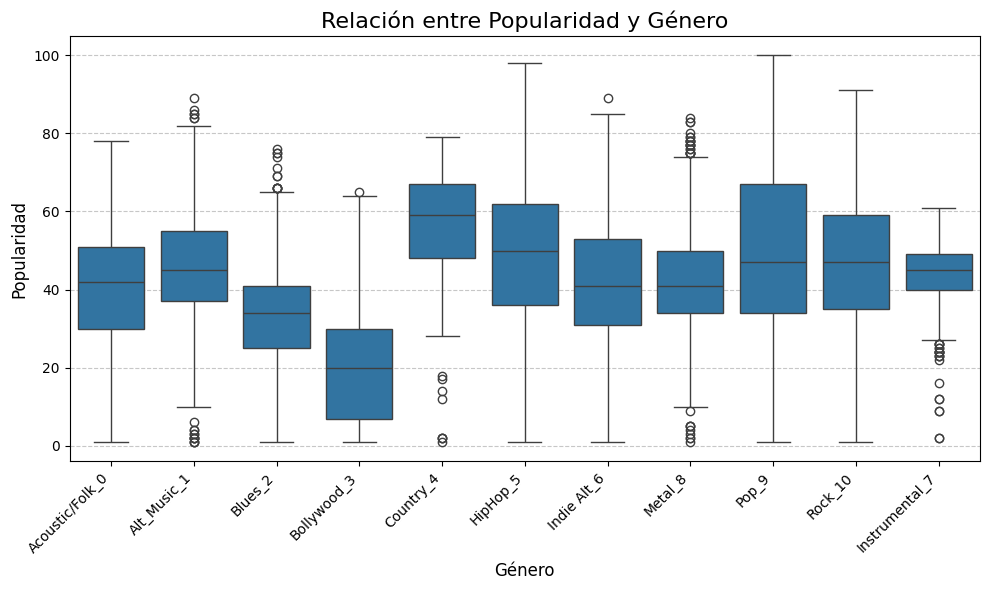

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura para mejor visibilidad
sns.boxplot(x='Genero', y='Popularity', data=df)
plt.title('Relación entre Popularidad y Género', fontsize=16) # Título más grande
plt.xlabel('Género', fontsize=12)  # Etiquetas de ejes más grandes
plt.ylabel('Popularidad', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula sutil
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

Popularidad por generos:

Acoustic/Folk y Indie Alt tienen una mediana de popularidad relativamente alta, lo que sugiere que, en promedio, las canciones de estos géneros son más populares.
Bollywood y Instrumental muestran medianas de popularidad más bajas, indicando que, en general, estos géneros son menos populares en comparación con otros.
Distribución de popularidad:

Géneros como Blues y Instrumental presentan más valores atípicos en la parte inferior, lo que indica que existen algunas canciones de muy baja popularidad en estos géneros.
En HipHop, el rango intercuartil es grande, lo que muestra una mayor variabilidad en la popularidad de las canciones dentro de este género. Esto podría sugerir que, aunque algunas canciones de HipHop son muy populares, otras no lo son tanto.
Outliers:

Algunos géneros, como Blues, Instrumental y Metal, tienen varios outliers hacia abajo, lo que sugiere que hay algunas canciones en estos géneros que son considerablemente menos populares que el resto.
Popularidad alta:

Géneros como Acoustic/Folk, Alt Music, y Pop presentan valores más altos de popularidad en general, con algunos valores cercanos a los 100 en estos géneros, indicando que estos estilos tienen algunas de las canciones más populares.

Acoustic/Folk e Indie Alt son los géneros más populares, mientras que Bollywood e Instrumental tienen menor popularidad. HipHop muestra alta variabilidad en popularidad. Blues, Instrumental y Metal presentan varios outliers hacia abajo. Pop y Alt Music incluyen canciones con popularidad muy alta.


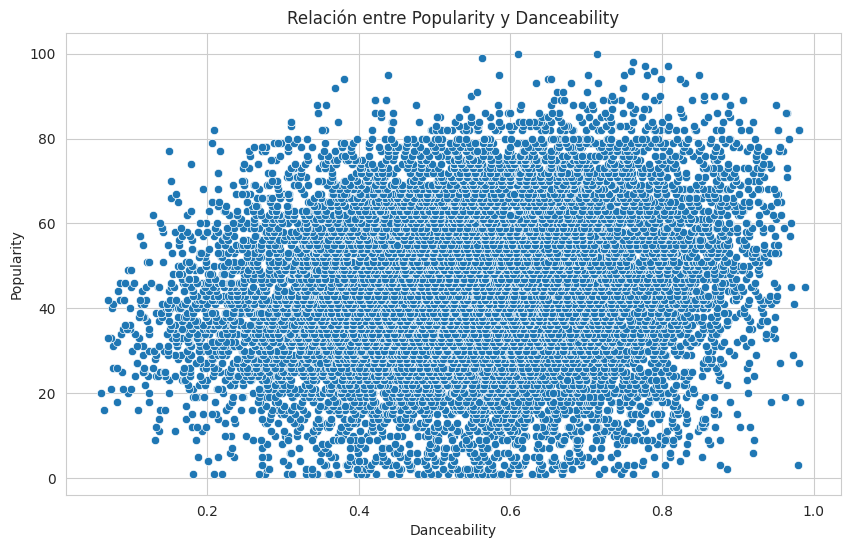

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('/content/DATASET.xlsx')

# Crear el gráfico de dispersión entre Popularity y danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='Popularity')
plt.title('Relación entre Popularity y Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()



No es claro que exista una relación directa entre la Danzabilidad y Popularidad de un tema Músical.

In [ ]:
# Coeficiente correlación entre Danzabilidad y Popularidad

# Calculate the correlation coefficient
correlation_coefficient = df['danceability'].corr(df['Popularity'])

print(f"The correlation coefficient between danceability and popularity is: {correlation_coefficient}")

The correlation coefficient between danceability and popularity is: 0.15279677620679322


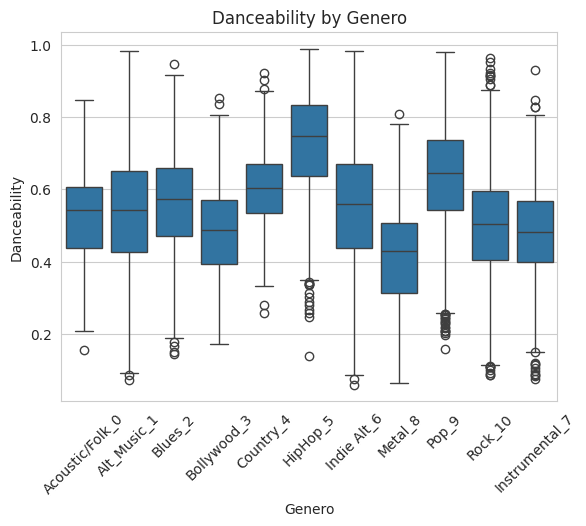

In [ ]:
import seaborn as sns

sns.boxplot(x='Genero', y='danceability', data=df)
plt.xlabel('Genero')
plt.ylabel('Danceability')
plt.title('Danceability by Genero')
plt.xticks(rotation=45)
plt.show()


El Rock y el Pop se encuentran entre los géneros que máyor nivel de popularidad poseen (analizando los promedios de la lista de canciones).
Se puede destacar que las canciones Country poseen una popolaridad promedio mayor al resto de las canciones

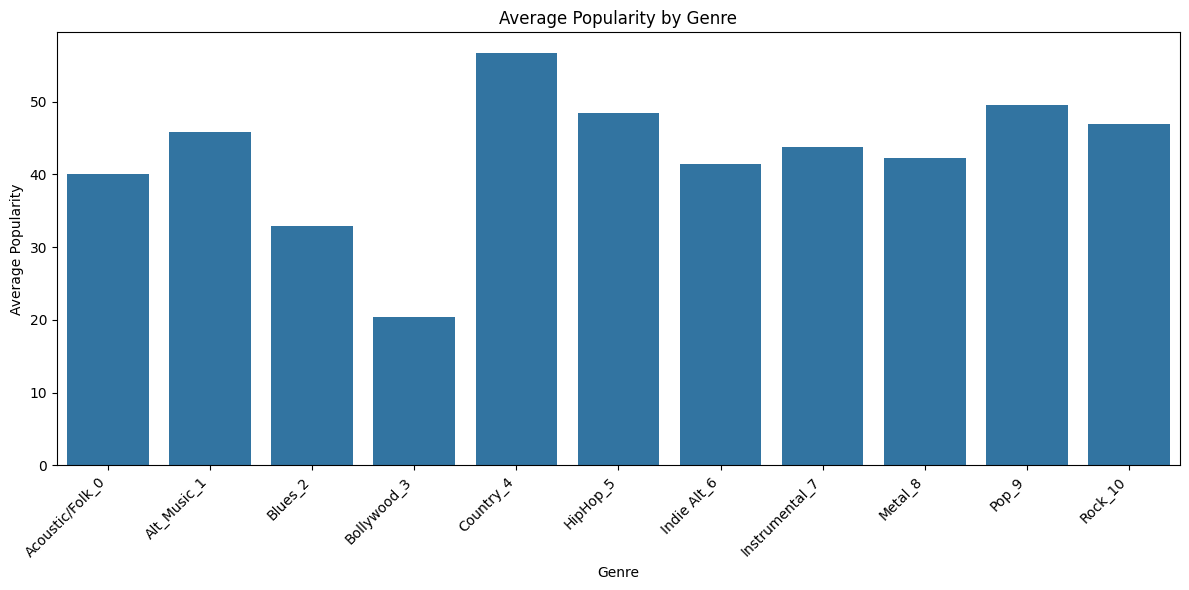

In [ ]:
# generar un barplot donde se pueda visualizar la popularidad promedio por genero

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average popularity for each genre
average_popularity_by_genre = df.groupby('Genero')['Popularity'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_popularity_by_genre.index, y=average_popularity_by_genre.values)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

El rock y el pop poseen una popularidad promedio alta en comparación con los demás géneros.
Se puede resaltar que la musica Contry posee la mayor popularidad promedio (en comparación con los demás géneros)

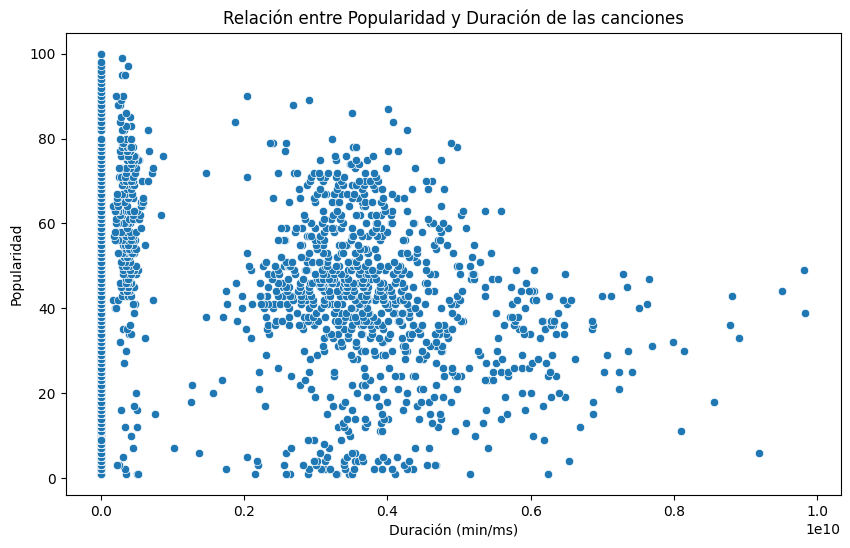

In [ ]:
# prompt: generar un diagrama de dispersión que relacione la popularidad con la duración de las canciones

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_in min/ms', y='Popularity')
plt.title('Relación entre Popularidad y Duración de las Canciones')
plt.xlabel('Duración (min/ms)')
plt.ylabel('Popularidad')
plt.show()

No se observa una relación directa entre popularidad y duración de las canciones.

In [ ]:
# Coeficiente de Correlación entre Popularidad y Duración de las canciones

# Calculate the correlation coefficient between popularity and duration
correlation_coefficient = df['Popularity'].corr(df['duration_in min/ms'])

print(f"The correlation coefficient between popularity and duration is: {correlation_coefficient}")

The correlation coefficient between popularity and duration is: -0.05362316466028071


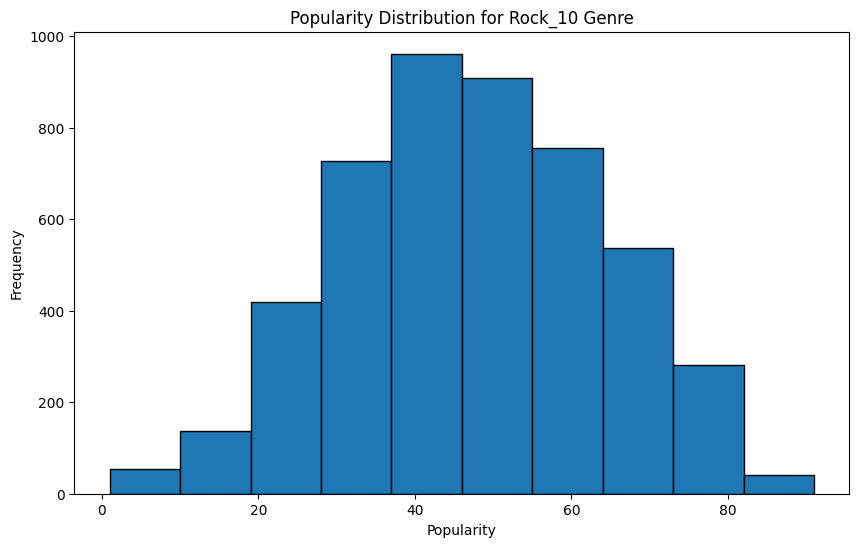

In [ ]:
# prompt: quiere hacer un histograma para analizar la columna popularity (solamente del Genero Rock_10)

# Filter the DataFrame for the 'Rock_10' genre
rock_10_df = df[df['Genero'] == 'Rock_10']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(rock_10_df['Popularity'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Rock_10 Genre')
plt.show()

La mayoria de las canciones del género ROCK poseen una popularidad entre los 30 y 70 puntos

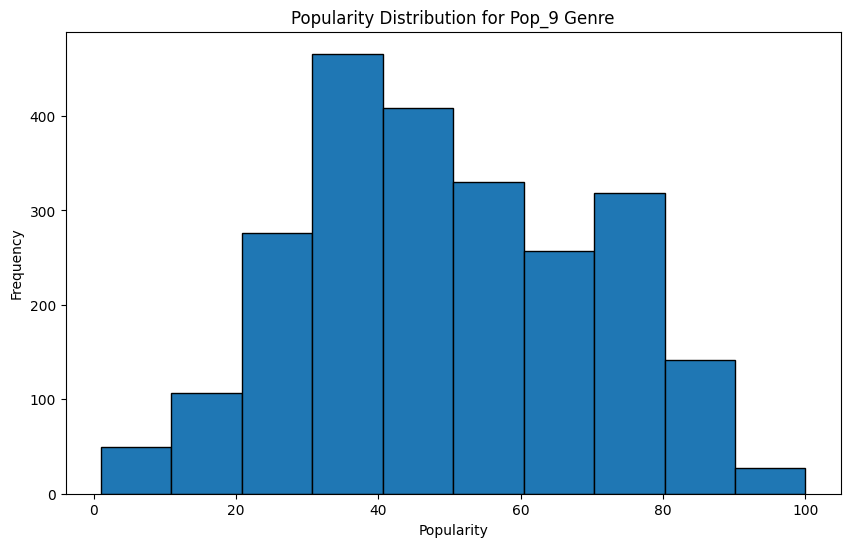

In [ ]:
# prompt: quisiera realizar un histograma para analizar la columna Popularity (solamente de las canciones del Genero Pop_9)

# Filter the DataFrame for the 'Pop_9' genre
pop_9_df = df[df['Genero'] == 'Pop_9']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(pop_9_df['Popularity'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Pop_9 Genre')
plt.show()

la mayoria de las canciones del genero Pop poseen una popularidad en el rango de los 40 y 70 puntos.

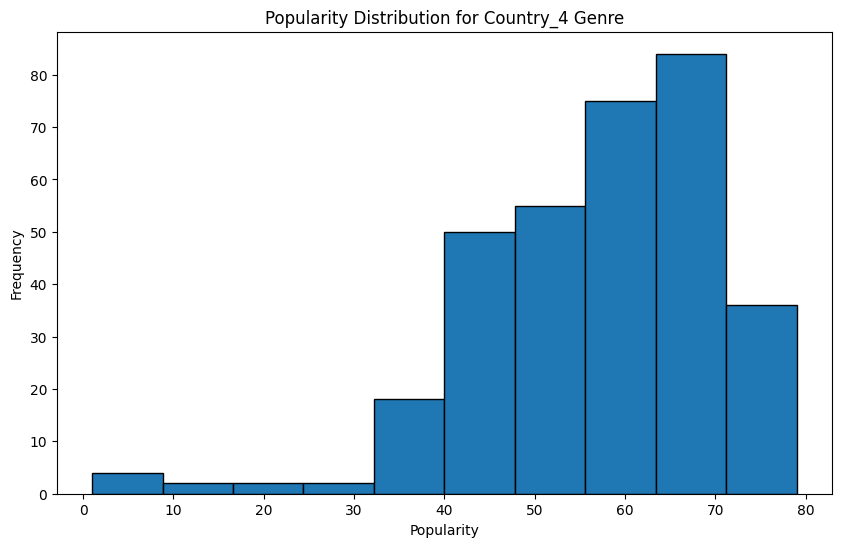

In [ ]:
# prompt: quisiera hacer un histograma para analizar la columna Popularity (del género Country_4)

# Filter the DataFrame for the 'Country_4' genre
country_4_df = df[df['Genero'] == 'Country_4']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(country_4_df['Popularity'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Country_4 Genre')
plt.show()

La mayoría de las canciones del genero Contry poseen una popularidad mayor a los 50 puntos. Me sorprende esta conclusión pero debemos considerar que las canciones de countr incluidas en el listado son pocas.